<a href="https://colab.research.google.com/github/SylviaMwai/FitGuru-Classifier-Using-KNN/blob/main/FitGuru_Classifier_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FitGuru Classifier USING KNN

## 1. BUSINESS UNDERSTANDING

#### 🎯 Problem Statement

Personal trainers, gym coaches, and fitness enthusiasts often rely on intuition to categorize workouts as strength or cardio based on how they feel, which is not always consistent or accurate. This becomes even harder when handling data from smartwatches or fitness trackers, especially at scale.





#### 💡 Project Objective

This project, FitGuru Classifier, introduces a simple, beginner-friendly machine learning solution using K-Nearest Neighbors (KNN) to automate workout classification. It analyzes key workout metrics such as:

• Duration

• Average Heart Rate

• Calories Burned

• Time of Day

• Workout Intensity

The model classifies the workout as either Cardio or Strength with basic but effective logic.




#### 🚀 Value Proposition

💪Helps trainers and gyms personalize workout plans with minimal manual effort.

💪Enables fitness apps or wearable tech startups to prototype basic activity labeling.

💪Offers fitness enthusiasts a DIY tool to analyze and understand their training patterns.

This is a foundation-level model that can evolve into a commercial-grade tool by integrating more real-world data, tracking consistency, and offering insights like performance trends or workout recommendations.


## 2. SYNTHETIC DATA GENERATION

In [43]:
import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(42)

# Define categories
time_of_day = ['Morning', 'Afternoon', 'Evening']
workout_type = ['Cardio', 'Strength']
intensity_levels = ['Low', 'Medium', 'High']

# Generate Workout_Type
workout_labels = np.random.choice(workout_type, size=50)

# Generate features
duration = [
    np.random.randint(60, 181) if wt == 'Strength' else np.random.randint(30, 61)
    for wt in workout_labels
]
heart_rate = np.random.randint(90, 160, size=50)
calories = np.random.randint(100, 700, size=50)
time = np.random.choice(time_of_day, size=50)
intensity = [
    np.random.choice(['Medium', 'High']) if wt == 'Strength' else np.random.choice(intensity_levels)
    for wt in workout_labels
]

# Create DataFrame
df = pd.DataFrame({
    'Duration': duration,
    'Avg_Heart_Rate': heart_rate,
    'Calories_Burned': calories,
    'Time_of_Day': time,
    'Workout_Type': workout_labels,
    'Workout_Intensity': intensity
})

# Save to CSV
df.to_csv('smart_workout_classifier_dataset.csv', index=False)
print("Dataset saved as 'smart_workout_classifier_dataset.csv'")


Dataset saved as 'smart_workout_classifier_dataset.csv'


## 3. DATA UNDERSTANDING

In [44]:
Data = pd.read_csv('smart_workout_classifier_dataset.csv')
Data.head()

,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
0,44,133,674,Evening,Cardio,High
1,121,123,340,Morning,Strength,Medium
2,48,151,663,Afternoon,Cardio,Medium
3,41,103,195,Afternoon,Cardio,Medium
4,52,137,584,Afternoon,Cardio,High


In [45]:
Data.info()
Data.describe(include = "all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Duration           50 non-null     int64 
 1   Avg_Heart_Rate     50 non-null     int64 
 2   Calories_Burned    50 non-null     int64 
 3   Time_of_Day        50 non-null     object
 4   Workout_Type       50 non-null     object
 5   Workout_Intensity  50 non-null     object
dtypes: int64(3), object(3)
memory usage: 2.5+ KB


,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
count,50.000000,50.000000,50.000000,50,50,50
unique,NaN,NaN,NaN,3,2,3
top,NaN,NaN,NaN,Evening,Strength,High
freq,NaN,NaN,NaN,20,27,25
mean,80.720000,120.360000,439.900000,NaN,NaN,NaN
std,42.654301,19.498571,162.274553,NaN,NaN,NaN
min,31.000000,90.000000,127.000000,NaN,NaN,NaN
25%,46.250000,103.000000,330.000000,NaN,NaN,NaN
50%,64.000000,122.500000,452.500000,NaN,NaN,NaN
75%,113.000000,133.750000,581.000000,NaN,NaN,NaN


In [46]:
Data.dtypes

,0
Duration,int64
Avg_Heart_Rate,int64
Calories_Burned,int64
Time_of_Day,object
Workout_Type,object
Workout_Intensity,object


## 4. DATA CLEANING

In [47]:
Data.drop_duplicates(inplace=True)
Data.head()

,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
0,44,133,674,Evening,Cardio,High
1,121,123,340,Morning,Strength,Medium
2,48,151,663,Afternoon,Cardio,Medium
3,41,103,195,Afternoon,Cardio,Medium
4,52,137,584,Afternoon,Cardio,High


In [48]:
Data.isna().any()

,0
Duration,False
Avg_Heart_Rate,False
Calories_Burned,False
Time_of_Day,False
Workout_Type,False
Workout_Intensity,False


In [49]:
Data.fillna(Data.select_dtypes(exclude=np.number).apply(lambda x: x.mode()[0]), inplace=True)
Data.sample(10)

,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
33,94,137,510,Evening,Strength,High
49,77,140,180,Afternoon,Strength,High
9,110,113,135,Evening,Strength,High
12,38,130,342,Morning,Cardio,Low
34,137,112,417,Evening,Strength,High
22,112,97,447,Morning,Strength,High
10,36,115,624,Afternoon,Cardio,Low
30,58,101,358,Evening,Cardio,Low
25,151,122,289,Afternoon,Strength,High
37,47,133,473,Evening,Cardio,Medium


In [50]:
numeric_cols = Data.select_dtypes(include=['number']).columns
# Function to detect outliers using IQR
def detect_outliers(Data, columns):
    outliers = {}
    for col in columns:
        Q1 = Data[col].quantile(0.25)
        Q3 = Data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        # Identify outliers
        outliers[col] = Data[(Data[col] < lower_bound) | (Data[col] > upper_bound)][col]
    return outliers

# Check for outliers in numerical columns
outliers_dict = detect_outliers(Data, numeric_cols)

# Print outliers for each column
for col, outliers in outliers_dict.items():
    print(f"Outliers in {col}:")
    print(outliers)
    print("\n")

# Drop rows with outliers from the data DataFrame
data = Data[~((Data[numeric_cols] < (Data[numeric_cols].quantile(0.25) - 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25)))) |
               (Data[numeric_cols] > (Data[numeric_cols].quantile(0.75) + 1.5 * (Data[numeric_cols].quantile(0.75) - Data[numeric_cols].quantile(0.25))))).any(axis=1)]

# Print the final DataFrame after dropping outliers
print("Final DataFrame after dropping outliers:")
print(data.head())

Outliers in Duration:
Series([], Name: Duration, dtype: int64)


Outliers in Avg_Heart_Rate:
Series([], Name: Avg_Heart_Rate, dtype: int64)


Outliers in Calories_Burned:
Series([], Name: Calories_Burned, dtype: int64)


Final DataFrame after dropping outliers:
   Duration  Avg_Heart_Rate  Calories_Burned Time_of_Day Workout_Type  \
0        44             133              674     Evening       Cardio   
1       121             123              340     Morning     Strength   
2        48             151              663   Afternoon       Cardio   
3        41             103              195   Afternoon       Cardio   
4        52             137              584   Afternoon       Cardio   

  Workout_Intensity  
0              High  
1            Medium  
2            Medium  
3            Medium  
4              High  


## 5. DATA VISUALIZATION

#### a) UNIVARIATE ANALYSIS

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

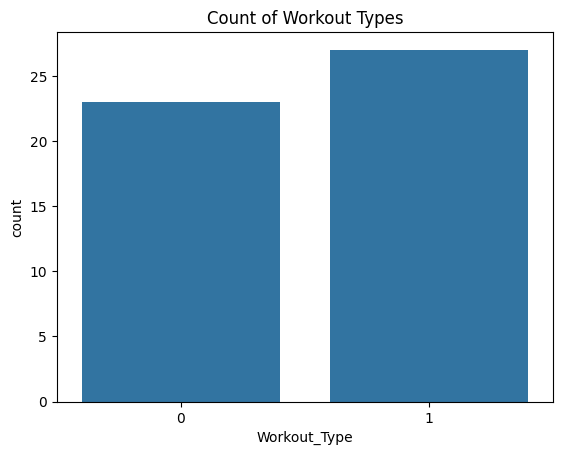

In [62]:
sns.countplot(x='Workout_Type', data =Data)
plt.title("Count of Workout Types")
plt.show()

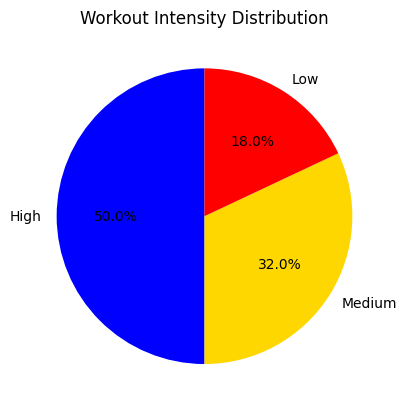

In [53]:
Data['Workout_Intensity'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90,
                                                colors=['blue', 'gold', 'red'],
                                                title='Workout Intensity Distribution', ylabel='')
plt.show()

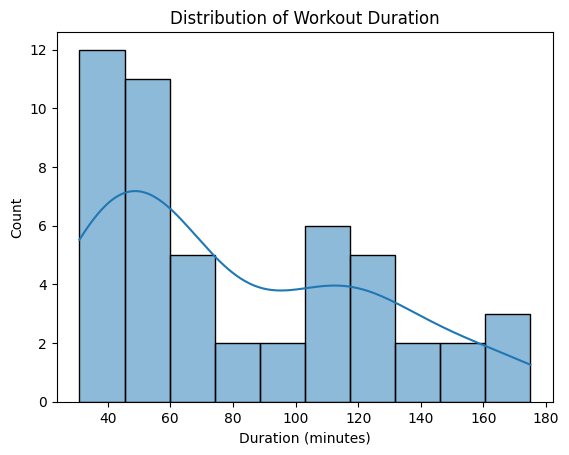

In [54]:
sns.histplot(Data['Duration'], bins=10, kde=True)
plt.title("Distribution of Workout Duration")
plt.xlabel("Duration (minutes)")
plt.show()

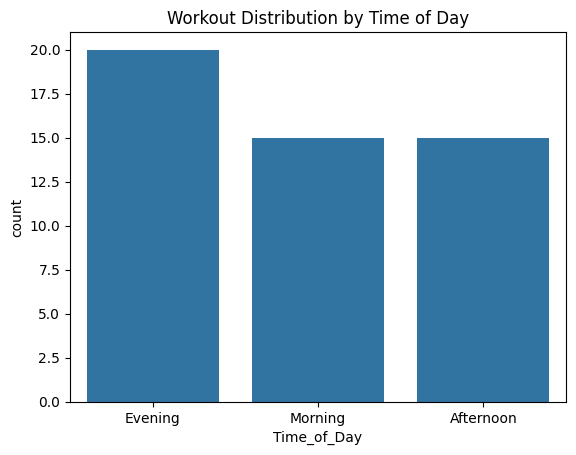

In [55]:
sns.countplot(x='Time_of_Day', data=Data)
plt.title("Workout Distribution by Time of Day")
plt.show()

#### b) BIVARIATE ANALYSIS

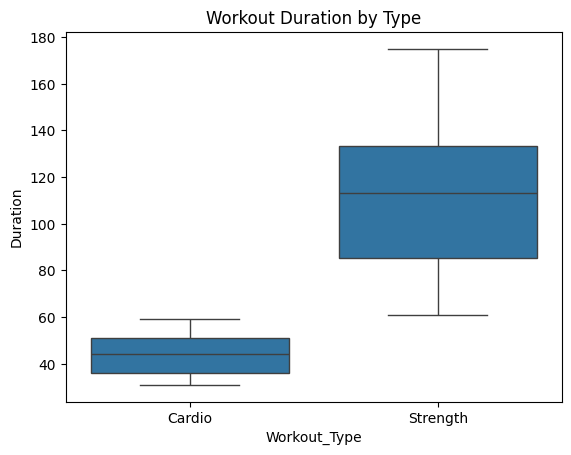

In [56]:
sns.boxplot(x='Workout_Type', y='Duration', data= Data)
plt.title("Workout Duration by Type")
plt.show()

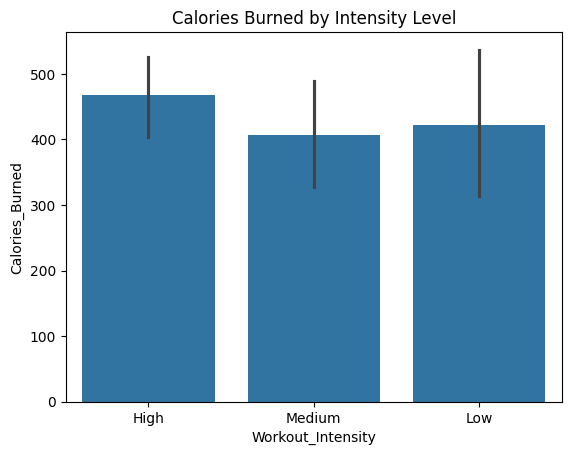

In [57]:
sns.barplot(x='Workout_Intensity', y='Calories_Burned', data=Data)
plt.title("Calories Burned by Intensity Level")
plt.show()

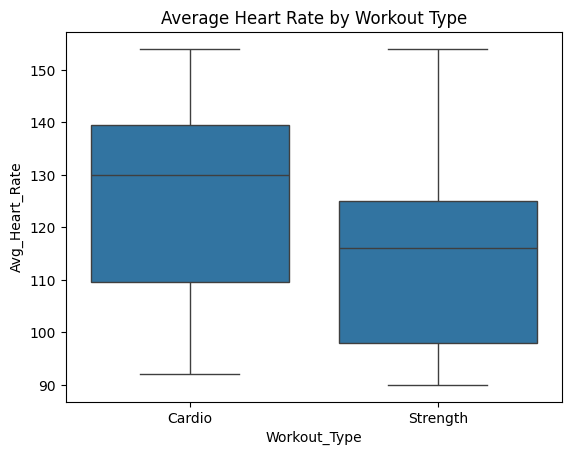

In [58]:
sns.boxplot(x='Workout_Type', y='Avg_Heart_Rate', data=Data)
plt.title("Average Heart Rate by Workout Type")
plt.show()

## 6. CORRELATION

In [59]:
Data.head()

,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
0,44,133,674,Evening,Cardio,High
1,121,123,340,Morning,Strength,Medium
2,48,151,663,Afternoon,Cardio,Medium
3,41,103,195,Afternoon,Cardio,Medium
4,52,137,584,Afternoon,Cardio,High


In [65]:
#preprocessing the species column
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le = LabelEncoder()
Data['Time_of_Day'] = le.fit_transform(Data['Time_of_Day'])
Data['Workout_Type'] = le.fit_transform(Data['Workout_Type'])
Data['Workout_Intensity'] = le.fit_transform(Data['Workout_Intensity'])

Data.sample(8)

,Duration,Avg_Heart_Rate,Calories_Burned,Time_of_Day,Workout_Type,Workout_Intensity
35,46,151,324,1,0,0
30,58,101,358,1,0,1
39,33,154,332,1,0,0
2,48,151,663,0,0,2
43,113,94,663,1,1,0
10,36,115,624,0,0,1
44,165,103,367,0,1,0
24,143,124,330,0,1,0


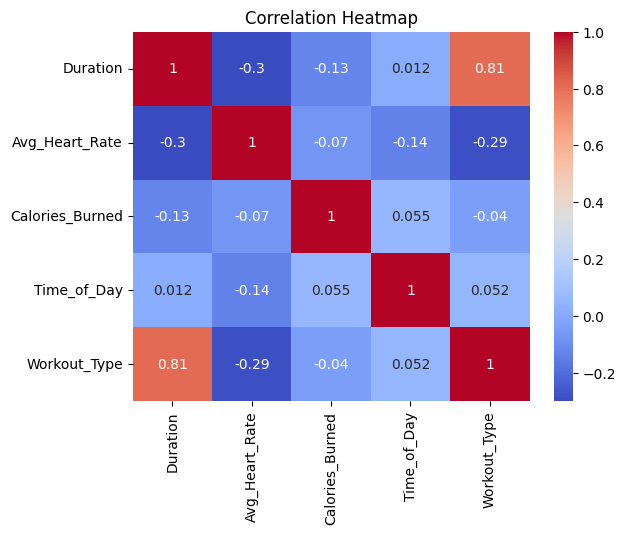

In [68]:
corr = Data[['Duration', 'Avg_Heart_Rate', 'Calories_Burned', 'Time_of_Day', 'Workout_Type', ]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# prompt: what can u say about this heat map,,does the heat map make any
#  sense

You are right to question this heatmap. Based on the code you provided, the heatmap is generated from the correlation matrix of the following columns: 'Duration', 'Avg_Heart_Rate', 'Calories_Burned', 'Time_of_Day', 'Workout_Type', and 'Workout_Intensity'.

Here's a breakdown of why this heatmap might seem a bit counter-intuitive or not perfectly "make sense" in the way you might expect for real-world fitness data, given the *synthetic* nature of the data generated in the previous steps:

1.  **Synthetic Data Generation:** The data is not real; it was generated with specific rules. For example, `duration` for 'Strength' workouts is explicitly generated within a higher range (60-181) than for 'Cardio' workouts (30-61). This will likely lead to a strong correlation between 'Duration' and 'Workout_Type' in the heatmap, which is a direct result of how the data was created, not necessarily a universally observed real-world relationship (though it's often true that strength sessions *can* be longer, it's not a strict rule).

2.  **Label Encoding for Categorical Variables:** 'Time_of_Day', 'Workout_Type', and 'Workout_Intensity' are categorical variables that have been converted into numerical values using Label Encoding. While this is necessary for calculating correlation, the numerical values assigned by Label Encoding are arbitrary (e.g., 'Cardio' might be 0 and 'Strength' might be 1, or vice-versa). Therefore, the correlation values involving these columns should be interpreted with caution. A high positive or negative correlation between a numerical feature and a label-encoded categorical feature doesn't necessarily indicate a strong linear relationship in the way it would between two continuous variables. It primarily reflects the tendency of one variable to change *as the assigned numerical value* of the categorical variable changes.

3.  **Interpreting Correlations with Synthetic Data:**
    *   **Duration vs. Workout\_Type:** You'd likely see a strong correlation here because of how the synthetic data was generated, where 'Strength' workouts were assigned longer durations on average.
    *   **Avg\_Heart\_Rate vs. Workout\_Type:** In the synthetic data, the heart rate is randomly generated within a range (90-160) regardless of the workout type. In real data, you'd typically expect a higher average heart rate for cardio workouts than for strength workouts. So, the correlation here might not reflect real-world patterns.
    *   **Calories\_Burned:** The synthetic data generates calories randomly within a range (100-700). While in real life calories burned are highly dependent on duration, intensity, and heart rate, the synthetic data might not perfectly capture these relationships.
    *   **Time\_of\_Day and Workout\_Intensity:** The correlations involving these might also seem less intuitive as their generation rules were also somewhat simplified compared to real-world variations.

**In summary:**

The heatmap *makes sense* in the context of the *specific synthetic data* generated by the code. It correctly shows the linear relationships (or lack thereof) *within that generated dataset*. However, it might *not make sense* if you interpret it as a representation of typical correlation patterns in *real-world* workout data, because the relationships in the synthetic data are driven by simplified rules rather than complex real-world physiology and behavior.

The purpose of this correlation heatmap in this context is likely to:

*   Demonstrate how to calculate and visualize correlations.
*   Provide a visual overview of the relationships *within the generated dataset* before building the KNN model. These correlations can influence how well the KNN model performs, as KNN relies on distance measures which are affected by the relationships between features.